# Defintion of Outliers

Outliers are data points that differ significantly from other observations in a dataset. They lie far from the majority of data values and can result from variability in the data, measurement errors, or unusual events. Outliers can influence statistical analyses and may need to be treated carefully based on the context.

### 3 Methods to handle the Outliers 
1) Drooping the outliers
2) Replacing the Outliers with Mean / Median 
3) Capping the Outliers

# 1. Dropping the outliers 

In [5]:
# Importing important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [6]:
# Importing irirs dataset
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
# Put iris dataset into a dataframe
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df_iris_columns = np.array(df_iris.keys())
df_iris_columns

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [11]:
for x in df_iris_columns:
    print(x)

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


# Find if there are outliers for each column 


In [13]:
# Determining the Qunatie ranges for each of the column in the df_iris dataset
def Quantiles(column_name):
    quantiles = []
    #defining the quantile ranges fro the column
    q1 = df_iris[column_name].quantile(0.25)
    quantiles.append(f"q1 is {q1}")
    q2 = df_iris[column_name].quantile(0.5)
    quantiles.append(f"q2 is {q2}")
    q3 = df_iris[column_name].quantile(0.75)
    quantiles.append(f"q3 is {q3} ")
    iqr = q3-q1
    quantiles.append(f"iqr is {iqr}")
    lw_f = q1-1.5*iqr
    quantiles.append(f"for {column_name} Lower fence is {lw_f}")
    up_f = q3+1.5*iqr
    quantiles.append(f"for {column_name} Upper fence is {up_f}")
    for x in quantiles:
        print(f"for {column_name} {x}")

    parameter = [q1,q2,q3,iqr,lw_f,up_f,]
    return parameter


def Outliers(column_name,lw_f,up_f):
    outliers = []
    data = df_iris[column_name]
    for x in data:
        if x < lw_f:
            print(f"{x} is lower Outlier")
            outliers.append(x)
        elif x > up_f:
            print(f"{x} is Higher Outlier ")
            outliers.append(x)
    # print(column_name,outliers)
    return outliers

 
q1,q2,q3,iqr,lw_f,up_f = Quantiles("sepal width (cm)")
out = Outliers("sepal width (cm)",lw_f,up_f)
out
# q1
# iqr
# # print(type(lw_f))
# Outliers("sepal length (cm)",lw_f,up_f)

for sepal width (cm) q1 is 2.8
for sepal width (cm) q2 is 3.0
for sepal width (cm) q3 is 3.3 
for sepal width (cm) iqr is 0.5
for sepal width (cm) for sepal width (cm) Lower fence is 2.05
for sepal width (cm) for sepal width (cm) Upper fence is 4.05
4.4 is Higher Outlier 
4.1 is Higher Outlier 
4.2 is Higher Outlier 
2.0 is lower Outlier


[4.4, 4.1, 4.2, 2.0]

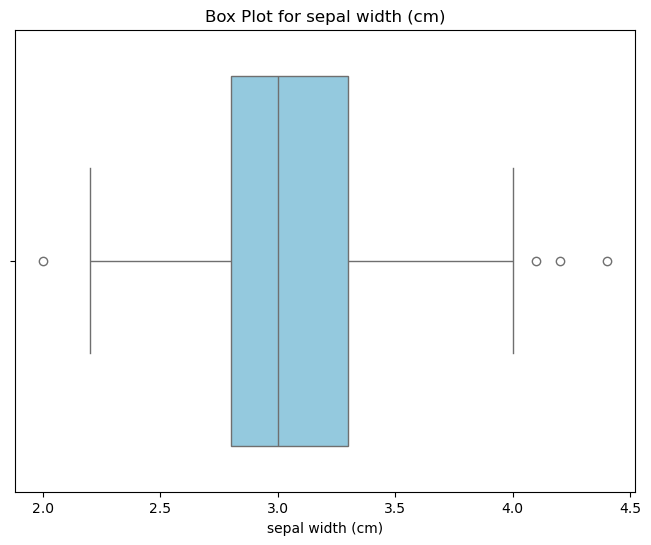

In [14]:
# So we conclude that the sepal width cm is the column with outliers 
# Construst a box plot to spot or visualize the outliers 

def plot_boxplot(column_name):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_iris[column_name], color="skyblue")
    plt.title(f"Box Plot for {column_name}")
    plt.xlabel(column_name)
    plt.show()

# Call the function to plot the box plot
plot_boxplot("sepal width (cm)")

## Handling Outliers

#### 1 Create a Function to drop outliers

In [17]:
# Create a function to drop the outliers from the sepal width (one of the columns ) of df_iris dataset


def DropOut(column_name, lw_f, up_f):
    global df_iris  # To modify the global variable df_iris
    # Identify indices of rows with outliers
    outlier_indices = df_iris[(df_iris[column_name] < lw_f) | (df_iris[column_name] > up_f)].index    
    # Drop the outlier rows
    df_iris = df_iris.drop(outlier_indices)
    return df_iris

# Call the function
df_iris = DropOut("sepal width (cm)", lw_f, up_f)

# Display the updated DataFrame
# df_iris

# Plot box plot for the sepal width column after dropping the outliers 
def plot_boxplot(column_name):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_iris[column_name], color="skyblue")
    plt.title(f"Box Plot for {column_name}")
    plt.xlabel(column_name)
    plt.show()

# Call the function to plot the box plot
plot_boxplot("sepal width (cm)")

#### Replacing the outliers with mean / median values

In [19]:
### Create a function to replace outliers with mean or median


mod = []

def Replace(column_name):
    for x in df_iris[column_name]:
        if x < lw_f:
            x= df_iris[column_name].mean()
            mod.append(x)
        elif x > up_f:
            x = df_iris[column_name].mean()
            mod.append(x)
        else:
            mod.append(x)
    df_iris["sepal width"] = mod
    return df_iris

rp = Replace("sepal width (cm)")



# Plot a Box plot after replacing the outliers with the mean value 
def plot_boxplot(column_name):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_iris[column_name], color="skyblue")
    plt.title(f"Box Plot for {column_name}")
    plt.xlabel(column_name)
    plt.show()

# Call the function to plot the box plot
plot_boxplot("sepal width (cm)") # This column has outliers in it 
plot_boxplot("sepal width") # This columns has outliers replaced by mean value

#### Create a function for Capping the Outliers

In [42]:
cap = []
def Capping(column_name):
    for x in df_iris[column_name]:
        if x < lw_f:
            x= df_iris[column_name].quantile(0.05)
            cap.append(x)
        elif x > up_f:
            x = df_iris[column_name].quantile(0.95)
            cap.append(x)
        else:
            cap.append(x)
    df_iris["sepal width capped"] = cap
    return df_iris

capp = Capping("sepal width (cm)")
    
# Plot a box plot after capping the outliers
def plot_boxplot(column_name):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_iris[column_name], color="skyblue")
    plt.title(f"Box Plot for {column_name}")
    plt.xlabel(column_name)
    plt.show()

# Call the function to plot the box plot
plot_boxplot("sepal width (cm)") # This column has outliers
plot_boxplot("sepal width capped") # This columns does not have the outliers

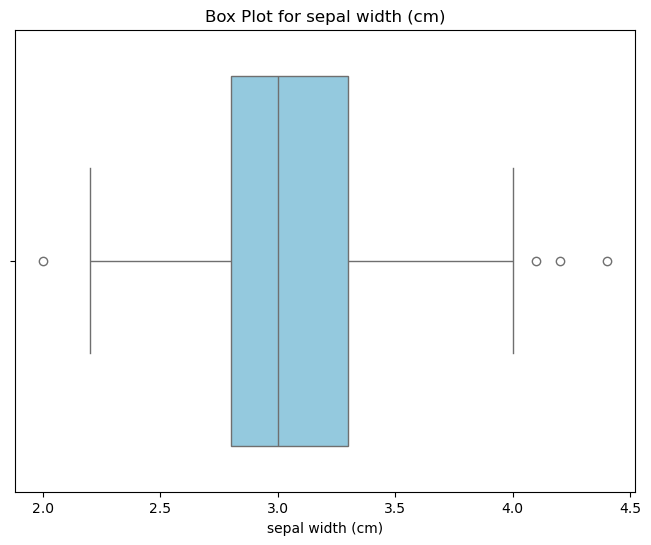

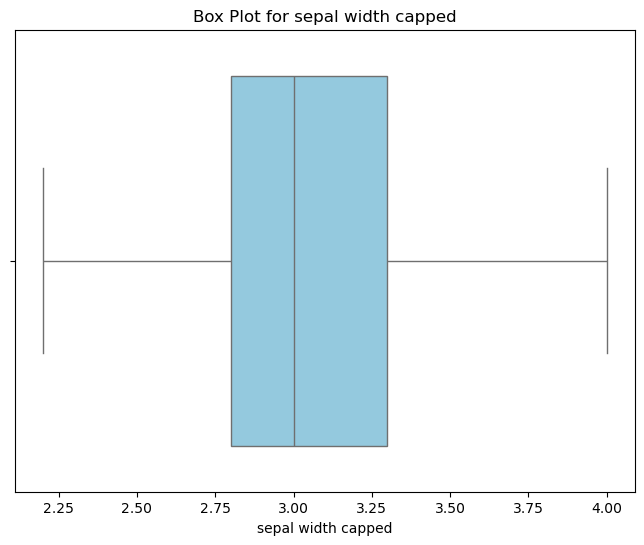